## Import ecat client and object

In [13]:
from neuromeka.ecat import EcatClient
import time

ip = '192.168.30.4'
ecat = EcatClient(ip)

## Get EtherCAT status

In [20]:
print("Master status: ", ecat.get_master_status())
print("Slave status: ", ecat.get_slave_status())
print("TxPDO domain: ", ecat.get_txdomain_status())
print("RxPDO domain: ", ecat.get_rxdomain_status())
print("System ready: ", ecat.is_system_ready())
print("Servo state: ", ecat.is_servo_on())
print(ecat.get_slave_type_num())
num_servo = ecat.get_slave_type_num().num_servo

In [15]:
ecat.is_servo_on()[0]

## Servo ON/OFF
* ecat.set_servo(servo_idx, True/False)

In [16]:
ecat.set_servo(0, True)
# ecat.set_servo(1, True)
# ecat.set_servo(2, True)
# ecat.set_servo(3, True)
# ecat.set_servo(4, True)
# ecat.set_servo(5, True)
# ecat.set_servo(6, True)

In [257]:
ecat.set_servo(0, False)
# ecat.set_servo(1, False)
# ecat.set_servo(2, False)
# ecat.set_servo(3, False)
# ecat.set_servo(4, False)
# ecat.set_servo(5, False)

## Get/Set Servo data

* ecat.get_servo_tx(slave_idx)
    * TxPDO : [statusWord, modeOpDisp, actualPosition, actualVelocity, actualTorque]
  
* ecat.get_servo_rx(slave_idx)
    * RxPDO : [controlWord, modeOp, targetPosition, targetVelocity, targetTorque]


* ecat.set_servo_rx(slave_idx, controlWord, modeOP, targetPosition, targetVelocity, targetTorque)


In [24]:
print('Tx PDO')
for i in range(0, 6):
    print(ecat.get_servo_tx(i))

print('Rx PDO')
for i in range(0, 6):
    print(ecat.get_servo_rx(i))


# Neuromeka CORE

## Get/Set Servo Temperature, Error code 

* ecat.get_servo_temperature(slave_idx) 
    * Temperature of CORE, Welcon Driver
* ecat.get_servo_errorcode(slave_idx
    * Errorcode of CORE

In [39]:
print("Temperature")    
for i in range(0,6):
    print(i, ecat.get_servo_temperature(i))
    
print("Error code")    
for i in range(0,6):    
    print(i, hex(ecat.get_servo_errorcode(i)))

# Neuromeka Endtool
* ecat.get_endtool_tx()
    * [status, button, ft_sensor, ft_state, ft_error]
* ecat.get_endtool_rx()
    * [eqc, gripper, ft_param, led_mode, led_g, led_r, led_b]

In [44]:
print(ecat.get_endtool_tx())
print(ecat.get_endtool_rx())

In [ ]:
endtool_rx = ecat.get_endtool_rx()
print(endtool_rx)
endtool_rx["led_mode"] = 6
endtool_rx["led_r"] = 0
endtool_rx["led_g"] = 0
endtool_rx["led_b"] = 0
print(endtool_rx)
ecat.set_endtool_rx(endtool_rx)

# Get/Set DIO PDO
### Type : Neuromeka IOboard, servo, endtool, dio
* EL1008: DI 8ch
* EL2008: DO 8ch
* EtherCAT connection order Example
```
"Slaves": [
    {"index": 0, "vendor": "Beckhoff","product": "EK1100", "dc_mode":  false, "type": "junction"},
    {"index": 1, "vendor": "Beckhoff","product": "EL1008", "dc_mode":  false, "type": "dio"},
    {"index": 2, "vendor": "Beckhoff","product": "EL1008", "dc_mode":  false, "type": "dio"},
    {"index": 3, "vendor": "Beckhoff","product": "EL2008", "dc_mode":  false, "type": "dio"},
    {"index": 4, "vendor": "Beckhoff","product": "EL2008", "dc_mode":  false, "type": "dio"},
    {"index": 5, "vendor": "Panasonic","product": "Driver200W", "dc_mode":  true, "type": "servo", "auto_servo": true, "init_mode":  "CST"},
    {"index": 6, "vendor": "Panasonic","product": "Driver200W", "dc_mode":  true, "type": "servo", "auto_servo": true, "init_mode":  "CST"}
  ]
  ```
* DIO index: EL1008 (0), EL1008 (1), EL2008 (2), EL2008 (3)

In [45]:
for i in range(0,4):
    print(ecat.get_di(i))

In [393]:
for i in range(0,4):
    print(ecat.get_do(i))

In [392]:
do_list1 = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ecat.set_do(0, do_list1)

# Third Party Motor
* ecat.set_servo_rx(slave_idx, controlWord, modeOP, targetPosition, targetVelocity, targetTorque)


## CST mode
* controlWord = 0x0f
* modeOP = 0x0a
* targetTorque = value

In [50]:
servo_idx = 0
controlWord = 0x0f
modeOP = 0x0a
targetTorque = 300

ecat.set_servo_rx(servo_idx, controlWord, modeOP, 0, 0, targetTorque)

In [51]:
ecat.set_servo_rx(0, 15, 10, 0, 0, 0)

## PP mode
* controlWord
    * sync_mode : 0x1f
    * async_mode : 0x3f -> 0x2f
* modeOP = 0x01
* targetPosition = value

In [52]:
def pp_move_to(slave_idx, current_pos, target_pos_cnt, sync_mode=False):
    if sync_mode:
        ecat.set_servo_rx(slave_idx, 0x1f, 0x01, target_pos_cnt, 0, 0)
    else:
        ecat.set_servo_rx(slave_idx, 0x3f,0x01, target_pos_cnt, 0, 0)
        time.sleep(0.01)
        ecat.set_servo_rx(slave_idx, 0x2f, 0x01, target_pos_cnt, 0, 0)
    

In [53]:
servo_idx = 0
current_pos = ecat.get_servo_tx(0)[2]
print(current_pos)

In [60]:
# For example when 1cm/count is 720000
target_pos_cm = 10
convert = 1/7200  
target_pos = 2 * 360000 * target_pos_cm 
target_pos_cnt = current_pos + int(target_pos)

pp_move_to(0,current_pos, target_pos_cnt)

In [59]:
# For example when 1cm/count is 720000
target_pos_cm = -10
target_pos = 2 * 360000 * target_pos_cm 
target_pos_cnt = current_pos + int(target_pos)

pp_move_to(0,current_pos, target_pos_cnt)

## PP mode
#### Change profiled velocity, acceleration Using SDO command


* Read
    * ethercattool -p(slave_idx) upload -t (size of data) (Index) (subIndex)  
(profiled vel, acc, dec)  
ethercattool -p0 upload -t uint32 0x6081 0    
ethercattool -p0 upload -t uint32 0x6083 0   
ethercattool -p0 upload -t uint32 0x6084 0    

* Write
    * ethercattool -p(slave_idx) download -t (size of data) (Index) (subIndex) (value)
    
ethercattool -p0 download -t uint32 0x6081 0 5000000   
ethercattool -p0 download -t uint32 0x6083 0 3000000   
ethercattool -p0 download -t uint32 0x6084 0 3000000    

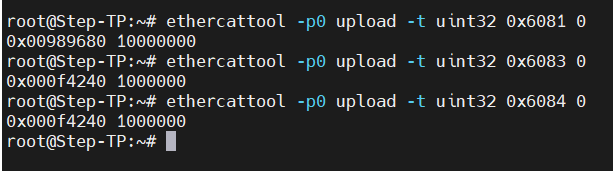

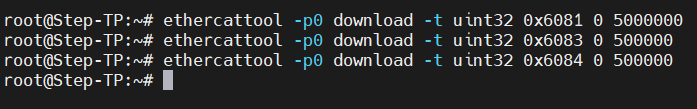

## Ext Servo
* ecat.get_axis_data(servo_idx)
    * {'active': (servo state)    
     'pos_mm': (current pos (mm))  
     'vel_mm': (current vel (mm/s))  
     'despos_mm': (target pos (mm))    
     'desvel_mm': (target vel (mm/s))    
     'desacc_mm': (target acc (mm/s))  
     'num_axes': (number of Ext Servo)    
     'op_state': (operation state)  
     'traj_state': (Not used) }

* ecat.move_axis(servo_idx, start_mm, target_mm, is_absolute=True, vel_ratio, acc_ratio, teaching_mode=True)
    * PP mode. move 'start_mm' to 'target_mm'
   

* ecat.stop_motion(servo_idx)

In [61]:
servo_idx = 0
ecat.get_axis_data(servo_idx)

In [62]:
def move_jog(servo_idx, target_dir, convert):

    cur_pos_cnt = ecat.get_servo_tx(servo_idx)[2]
    start_pos_mm = cur_pos_cnt * convert
    target_pos_mm = start_pos_mm + 1000*target_dir 

    ecat.move_axis(servo_idx, start_pos_mm, target_pos_mm)

In [65]:
## MOVE JOG
servo_idx = 0
target_dir = 1
convert = 1/7200

move_jog(servo_idx, target_dir, convert)

In [64]:
## STOP JOG
servo_idx = 0
ecat.stop_motion(servo_idx)

# Test ext servo jog

In [80]:
import keyboard
import time
from IPython.display import clear_output
import os,sys

servo_idx = 0
convert = 1/7200

while True:
    clear_output(wait=True)
    time.sleep(0.1)
#     time.sleep(0.01)
    key = keyboard.read_key()
    if key == "q":
        print("q")
        break
    else:
        if key=="4":
            target_dir = -1
            move_jog(servo_idx,target_dir,convert)
        elif key=="6":
            target_dir = 1
            move_jog(servo_idx,target_dir,convert)
        elif key=="7":
            ecat.stop_motion(servo_idx)
        key = False

## Test est servo Target

In [71]:
def move_target(servo_idx, target_pos_mm, convert):
    cur_pos_cnt = ecat.get_servo_tx(servo_idx)[2]
    start_pos_mm = cur_pos_cnt * convert
    ecat.move_axis(servo_idx, start_pos_mm, target_pos_mm)

In [79]:
servo_idx = 0
save_pos1 = ecat.get_axis_data(servo_idx)['pos_mm'][servo_idx]
print(save_pos1)

In [81]:
servo_idx = 0
save_pos2 = ecat.get_axis_data(servo_idx)['pos_mm'][servo_idx]
print(save_pos2)

In [82]:
servo_idx = 0
convert = 1/7200
print(save_pos1)
move_target(servo_idx, save_pos1, convert)


In [83]:
servo_idx = 0
convert = 1/7200
print(save_pos2)
move_target(servo_idx, save_pos2, convert)